In [32]:
%load_ext autoreload
%autoreload 2

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


#### Load in Nips dataframes and embeddings

In [33]:
import bert
import samples
import sklearn.mixture
import numpy as np
import pandas as pd
import pickle
import matplotlib.pyplot as  plt
from sklearn.decomposition import PCA
from sklearn.manifold import TSNE
from utils import *
import pdb
import umap
import hdbscan


from numpy import dot
from numpy.linalg import norm
from sklearn.metrics import silhouette_score


#### Pick a dim and clustering method to cluster the embeddings

In [34]:
# Data loading
years = ["2018", "2019", "2022"]
nips_df = pd.read_csv(f"nips_{years[0]}_clean2.csv")
embeddings = load_embeddings(f"outputs/clean2_nips_{years[0]}_embeddings.pkl")
for year in years[1:]:
    current_df = pd.read_csv(f"nips_{year}_clean2.csv")
    nips_df = pd.concat([nips_df, current_df], ignore_index=True)
    del current_df
    current_embeddings = load_embeddings(f"outputs/clean2_nips_{year}_embeddings.pkl")
    embeddings = np.append(embeddings, current_embeddings, axis=0)
    del current_embeddings
    
nips_df

,Unnamed: 0,title,authors,abstract,year
0,0,Synthesized Policies for Transfer and Adaptati...,"Hexiang Hu, Liyu Chen, Boqing Gong, Fei Sha",The ability to transfer in reinforcement learn...,2018
1,1,Self-Supervised Generation of Spatial Audio fo...,"Pedro Morgado, Nuno Nvasconcelos, Timothy Lang...",We introduce an approach to convert mono audio...,2018
2,2,On GANs and GMMs,"Eitan Richardson, Yair Weiss",A longstanding problem in machine learning is ...,2018
3,3,Batch-Instance Normalization for Adaptively St...,"Hyeonseob Nam, Hyo-Eun Kim",Real-world image recognition is often challeng...,2018
4,4,Hierarchical Reinforcement Learning for Zero-s...,"Sungryull Sohn, Junhyuk Oh, Honglak Lee",We introduce a new RL problem where the agent ...,2018
...,...,...,...,...,...
4502,2619,Cost-efficient Gaussian tensor network embeddi...,"Linjian Ma, Edgar Solomonik","This work discusses tensor network embeddings,...",2022
4503,2620,Neural Transmitted Radiance Fields,"Chengxuan Zhu, Renjie Wan, Boxin Shi",Neural radiance fields (NeRF) have brought tre...,2022
4504,2622,Structural Kernel Search via Bayesian Optimiza...,"Matthias Bitzer, Mona Meister, Christoph Zimmer",Despite recent advances in automated machine l...,2022
4505,2623,Near-Optimal No-Regret Learning Dynamics for G...,"Gabriele Farina, Ioannis Anagnostides, Haipeng...",A recent line of work has established un...,2022


In [35]:
nips_df.head()

,Unnamed: 0,title,authors,abstract,year
0,0,Synthesized Policies for Transfer and Adaptati...,"Hexiang Hu, Liyu Chen, Boqing Gong, Fei Sha",The ability to transfer in reinforcement learn...,2018
1,1,Self-Supervised Generation of Spatial Audio fo...,"Pedro Morgado, Nuno Nvasconcelos, Timothy Lang...",We introduce an approach to convert mono audio...,2018
2,2,On GANs and GMMs,"Eitan Richardson, Yair Weiss",A longstanding problem in machine learning is ...,2018
3,3,Batch-Instance Normalization for Adaptively St...,"Hyeonseob Nam, Hyo-Eun Kim",Real-world image recognition is often challeng...,2018
4,4,Hierarchical Reinforcement Learning for Zero-s...,"Sungryull Sohn, Junhyuk Oh, Honglak Lee",We introduce a new RL problem where the agent ...,2018


In [36]:
dim_range = [-1] + list(range(5, 750, 150))
num_cluster_range = [5,15]
cluster_algorithm = "kmeans"
saving_dir = "outputs/kmeans3"
cluster_models, dim_reduce_models, scores = dim_reduce_train_cluster(embeddings, cluster_algorithm,  "umap", "sil", dim_range=dim_range, num_cluster_range=num_cluster_range, saving_path=saving_dir)

  0%|          | 0/6 [00:00<?, ?it/s]

0.04392667


 17%|█▋        | 1/6 [00:07<00:39,  7.97s/it]

0.027673287


0.28632095


 33%|███▎      | 2/6 [00:16<00:33,  8.46s/it]

0.2744417


0.28227255


 50%|█████     | 3/6 [00:32<00:35, 11.81s/it]

0.26936477


0.28219554


 67%|██████▋   | 4/6 [00:58<00:34, 17.43s/it]

0.2653513


0.28414288


 83%|████████▎ | 5/6 [01:44<00:27, 27.67s/it]

0.2670859


0.28089547


100%|██████████| 6/6 [02:54<00:00, 29.08s/it]

0.27143052


In [37]:
dim_range

[-1, 5, 155, 305, 455, 605]

In [38]:
scores

{(-1, 5): 0.04392667,
 (-1, 15): 0.027673287,
 (5, 5): 0.28632095,
 (5, 15): 0.2744417,
 (155, 5): 0.28227255,
 (155, 15): 0.26936477,
 (305, 5): 0.28219554,
 (305, 15): 0.2653513,
 (455, 5): 0.28414288,
 (455, 15): 0.2670859,
 (605, 5): 0.28089547,
 (605, 15): 0.27143052}

In [8]:
list(scores.values())

[0.044058938,
 0.028347332,
 0.2869509,
 0.26760754,
 0.28266686,
 0.27029562,
 0.2843175,
 0.2690409,
 0.2842368,
 0.26954332,
 0.28376314,
 0.2686469]

In [39]:
dim_range = [-1]+list(range(5, 750, 150))
select_dims_5, select_scores_5 = simplify_scores(scores, dim_range, [5], True)
select_dims_15, select_scores_15 = simplify_scores(scores, dim_range, [15], True)

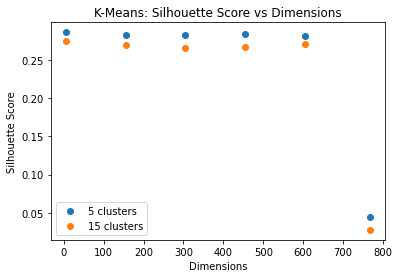

In [40]:
plt.scatter(select_dims_5, select_scores_5)
plt.scatter(select_dims_15, select_scores_15)
plt.legend(["5 clusters", "15 clusters"])
plt.title("K-Means: Silhouette Score vs Dimensions")
plt.ylabel("Silhouette Score")
plt.xlabel("Dimensions")
plt.show()

In [41]:
model = cluster_models[(5, 5)]


In [42]:
reduce_dim_model = dim_reduce_models[5]

In [43]:
reduced_embeddings = reduce_dim_model.transform(embeddings)
clusters = model.predict(reduced_embeddings)

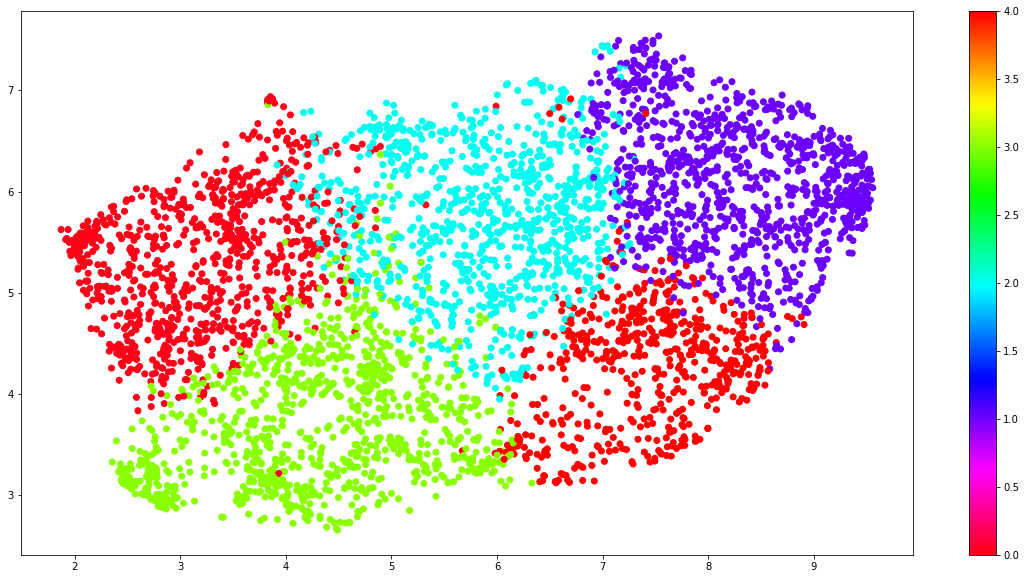

In [44]:
if cluster_algorithm == "gmm":
    paper_labels = clusters
elif cluster_algorithm == "kmeans":
    paper_labels = clusters
elif cluster_algorithm == "dbscan":
    paper_labels = clusters.labels_

# for dbscan
# visualize(embeddings, clusters.labels_)

# for gmm
visualize(embeddings, paper_labels)


In [45]:
dic = {}
# for dbscan
# dic = metrics(["sil"], reduced_embeddings, clusters.labels_, dic)

# for gmm
dic = metrics(["sil"], reduced_embeddings, paper_labels, dic)

print(dic)

{'sil': 0.28632095}


In [46]:
scores

{(-1, 5): 0.04392667,
 (-1, 15): 0.027673287,
 (5, 5): 0.28632095,
 (5, 15): 0.2744417,
 (155, 5): 0.28227255,
 (155, 15): 0.26936477,
 (305, 5): 0.28219554,
 (305, 15): 0.2653513,
 (455, 5): 0.28414288,
 (455, 15): 0.2670859,
 (605, 5): 0.28089547,
 (605, 15): 0.27143052}

#### Provide an overview of the topics

In [47]:
nips_df, docs_per_topic = create_docs_per_topic(nips_df, paper_labels)

tf_idf, count = c_tf_idf(docs_per_topic.abstract.values, m=len(nips_df))

top_n_words = extract_top_n_words_per_topic(tf_idf, count, docs_per_topic, n=20)
topic_sizes = extract_topic_sizes(nips_df); topic_sizes.head(10)

,Topic,Size
1,1,1048
3,3,1048
2,2,951
0,0,887
4,4,573


In [50]:
top_n_words[0][:10]

[('image', 0.01042335517002673),
 ('3d', 0.009250306901685237),
 ('images', 0.00790431770542336),
 ('object', 0.007800821057053589),
 ('semantic', 0.006585097337063973),
 ('art', 0.006238150016516876),
 ('video', 0.006208134385402998),
 ('attention', 0.006036605930183708),
 ('text', 0.005724267893787524),
 ('segmentation', 0.005559518511595964)]

In [23]:
top_n_words[1][:10]

[('regret', 0.017171861000077844),
 ('setting', 0.009427370253461515),
 ('policy', 0.009247109101517421),
 ('optimal', 0.009028983073549067),
 ('bandit', 0.009013667866586621),
 ('online', 0.008294936541044741),
 ('reward', 0.008154929684047305),
 ('algorithm', 0.00783557654104719),
 ('algorithms', 0.007598686126360614),
 ('games', 0.0073937750842408825)]

In [24]:
top_n_words[3][:10]

[('graph', 0.008270094075654896),
 ('inference', 0.006148953918746689),
 ('networks', 0.005424463552891732),
 ('graphs', 0.005385927164375365),
 ('variational', 0.005312604763860739),
 ('latent', 0.0051375960889784855),
 ('deep', 0.0050475067751202495),
 ('bayesian', 0.004949650251335908),
 ('neural', 0.004866475401398864),
 ('distribution', 0.004843087406359443)]

In [25]:
top_n_words[0][:10]

[('agent', 0.006493009611506849),
 ('tasks', 0.006013873589898667),
 ('rl', 0.005994320758324648),
 ('reinforcement', 0.0059770917993374325),
 ('policy', 0.005958653453396155),
 ('task', 0.005737452631222691),
 ('human', 0.005386684368228433),
 ('adversarial', 0.005356457554683801),
 ('agents', 0.005179382347863529),
 ('training', 0.005064562375847139)]

In [26]:
top_n_words[2][:10]

[('image', 0.010233593427430004),
 ('3d', 0.009088639427484245),
 ('images', 0.007746806764869943),
 ('object', 0.007624252701605716),
 ('semantic', 0.006463787964009442),
 ('art', 0.006237759280431347),
 ('video', 0.0060388593603250326),
 ('attention', 0.005945180350793411),
 ('text', 0.005759251502522584),
 ('language', 0.005476377443683355)]

#### Accept a user input, Find the relevant cluster and suggests 10 papers

In [51]:
# initialize Bert model for embedding
bert_model = BertForEmbedding()


Some weights of the model checkpoint at bert-base-uncased were not used when initializing BertModel: ['cls.predictions.transform.LayerNorm.bias', 'cls.predictions.transform.dense.bias', 'cls.seq_relationship.bias', 'cls.predictions.bias', 'cls.predictions.transform.LayerNorm.weight', 'cls.predictions.decoder.weight', 'cls.seq_relationship.weight', 'cls.predictions.transform.dense.weight']
- This IS expected if you are initializing BertModel from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing BertModel from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).


In [55]:
# use bert to verterize input
# sample_embedding = bert_model.bertify_single_abstract(sample_entry["abstract"])

sample_embedding = bert_model.bertify_single_abstract("Value-function-based methods have long played an important role in reinforcement learning. However, finding the best next action given a value function of arbitrary complexity is nontrivial when the action space is too large for enumeration. We develop a framework for value-function-based deep reinforcement learning with a combinatorial action space, in which the action selection problem is explicitly formulated as a mixed-integer optimization problem. As a motivating example, we present an application of this framework to the capacitated vehicle routing problem (CVRP), a combinatorial optimization problem in which a set of locations must be covered by a single vehicle with limited capacity. On each instance, we model an action as the construction of a single route, and consider a deterministic policy which is improved through a simple policy iteration algorithm. Our approach is competitive with other reinforcement learning methods and achieves an average gap of 1.7% with state-of-the-art OR methods on standard library instances of medium size.")
# sample_embedding = bert_model.bertify_single_abstract("Deterministic-policy actor-critic algorithms for continuous control improve the actor by plugging its actions into the critic and ascending the action-value gradient, which is obtained by chaining the actor's Jacobian matrix with the gradient of the critic with respect to input actions. However, instead of gradients, the critic is, typically, only trained to accurately predict expected returns, which, on their own, are useless for policy optimization. In this paper, we propose MAGE, a model-based actor-critic algorithm, grounded in the theory of policy gradients, which explicitly learns the action-value gradient. MAGE backpropagates through the learned dynamics to compute gradient targets in temporal difference learning, leading to a critic tailored for policy improvement. On a set of MuJoCo continuous-control tasks, we demonstrate the efficiency of the algorithm in comparison to model-free and model-based state-of-the-art baselines.")
# sample_embedding = bert_model.bertify_single_abstract("Image Generation")

sample_embedding.shape

torch.Size([1, 768])

In [56]:
sample_embedding = reduce_dim_model.transform(sample_embedding.cpu())

# (sample_embedding, "umap", lower_dim)
sample_class = model.predict(sample_embedding)

# sample_class = hdbscan.approximate_predict(clusters, sample_embedding)[0]
# sample_class = np.array(4)
print(f"The predicted cluster is: {sample_class}")
top_n_words[sample_class.item()][:10]

The predicted cluster is: [4]


[('regret', 0.016559262114485232),
 ('setting', 0.00907264986209663),
 ('policy', 0.008953767477160363),
 ('optimal', 0.008862050296546863),
 ('bandit', 0.008726147721658986),
 ('online', 0.007982825840278967),
 ('reward', 0.007848086972739107),
 ('algorithm', 0.007656761558472182),
 ('algorithms', 0.007598847247837318),
 ('games', 0.007115572073111362)]

#### First iteration: User labels the 10 papers

In [57]:
relevant_embeddings, relevant_df = select_cluster(sample_class, reduced_embeddings, nips_df, paper_labels)

# relevant_embeddings, relevant_df = select_cluster(sample_class, embeddings, nips_df, paper_labels)
relevant_embeddings = reduced_embeddings
relevant_df = nips_df
scores = cos_sim(sample_embedding, relevant_embeddings)
best_matches = np.argsort(scores)[-20:][::-1]
for i, match_idx in enumerate(best_matches):
  print(f"score: {scores[match_idx]}")
  print(f"title: {relevant_df.iloc[match_idx]['title']}")
  print(f"abstract: {relevant_df.iloc[match_idx]['abstract']}")

score: 0.9999344348907471
title: Exponentially Weighted Imitation Learning for Batched Historical Data
abstract: We consider deep policy learning with only batched historical trajectories. The main challenge of this problem is that the learner no longer has a simulator or ``environment oracle'' as in most reinforcement learning settings. To solve this problem, we propose a monotonic advantage reweighted imitation learning strategy that is applicable to problems with complex nonlinear function approximation and works well with hybrid (discrete and continuous) action space. The method does not rely on the knowledge of the behavior policy, thus can be used to learn from data generated by an unknown policy. Under mild conditions, our algorithm, though surprisingly simple, has a policy improvement bound and outperforms most competing methods empirically. Thorough numerical results are also provided to demonstrate the efficacy of the proposed methodology.
score: 0.999860405921936
title: Robu

In [31]:
np.min(scores)

0.9549087